In [15]:
#dados de vinhos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('winequality-red.csv', sep=';')

In [2]:
df['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [3]:
#quão dispersos estão os dados
df.pH.var()

0.023835180545412844

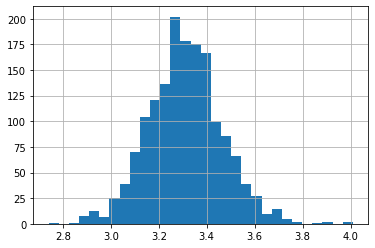

In [4]:
#ph dos vinhos
df.pH.hist(bins=30)

c:\users\thiago fernandes\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


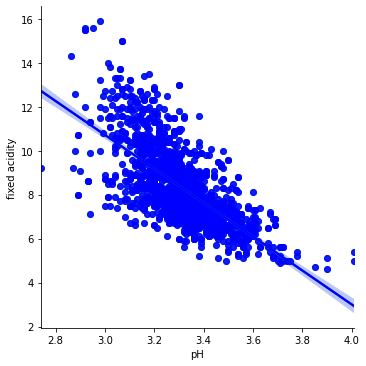

In [5]:
#se aumenta o ph, diminui a acidez fixa
sns.lmplot('pH', 'fixed acidity', data=df)
sns.regplot(x=df['pH'], y=df['fixed acidity'], data=df, color = 'b')

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


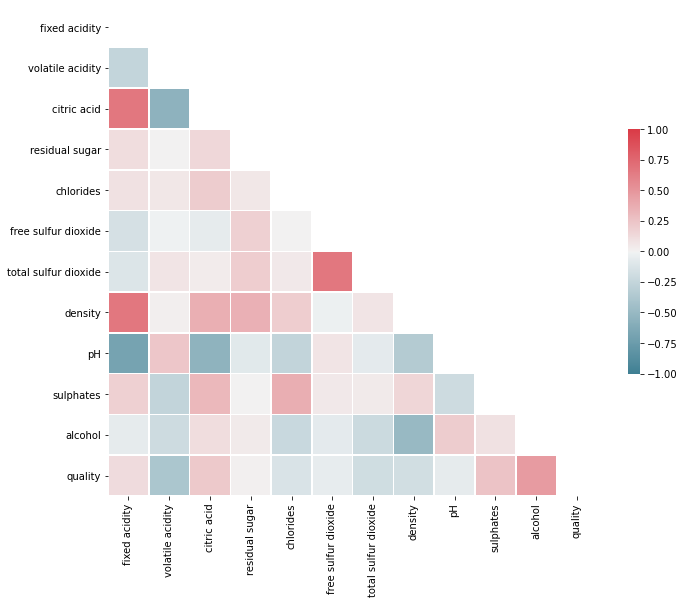

In [7]:
#1 = correlação perfeita: se aumentar um valor, o outro também aumenta na mesma proporção;
#-1 = se aumenta um valor, o outro tende a diminuir;
#0 = não há correlação nenhuma: uma variável não influencia na outra.

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [8]:
def cat (qualidade):
    if qualidade <= 4:
        return 'Ruim'
    elif 4 < qualidade <= 7:
        return 'Boa'
    else:
        return 'Ótima'

In [9]:
a = df['quality'].apply(cat)
a

0       Boa
1       Boa
2       Boa
3       Boa
4       Boa
       ... 
1594    Boa
1595    Boa
1596    Boa
1597    Boa
1598    Boa
Name: quality, Length: 1599, dtype: object

In [10]:
a = a.value_counts()
a

Boa      1518
Ruim       63
Ótima      18
Name: quality, dtype: int64

In [11]:
x = a.index
y = a.values

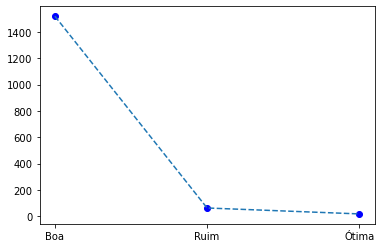

In [12]:
plt.scatter(x, y, color = 'b')
plt.plot(x, y, linestyle='--')
plt.show()

In [13]:
def por (s):
    return (s*100)/a.sum()

In [14]:
#categorização dos vinhos em porcentagem.
a.apply(por)

Boa      94.934334
Ruim      3.939962
Ótima     1.125704
Name: quality, dtype: float64